In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# variable information
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              


Analiza eksploracyjna powinna obejmować odpowiedzi na pytania:
• Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?
• Jakie są średnie i odchylenia cech liczbowych?
• Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?
• Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?
• Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je
zastąpić?

In [2]:
display(X)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [3]:
display(y)

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [4]:

import pandas as pd

count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for index, row in y.iterrows():
    if row[0] == 0:
        count0 += 1
    elif row[0] == 1:
        count1 += 1
    elif row[0] == 2:
        count2 += 1
    elif row[0] == 3:
        count3 += 1
    elif row[0] == 4:
        count4 += 1

classes = pd.DataFrame({'class': [0,1,2,3,4], 'quantity': [count0,count1,count2,count3,count4]})

display(classes)

,class,quantity
0,0,164
1,1,55
2,2,36
3,3,35
4,4,13


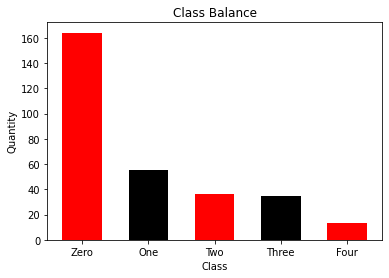

In [5]:
import matplotlib.pyplot as plt

bar_labels=['Zero','One','Two','Three','Four']
plt.bar(classes["class"],classes["quantity"],tick_label=bar_labels,width=0.6,color=['red','black'])
plt.xlabel('Class')
plt.ylabel('Quantity')
plt.title("Class Balance")
plt.show()

In [6]:
#Jakie są średnie i odchylenia cech liczbowych?

df_mean = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]].mean()
display(df_mean)

df_dev = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]].std()
display(df_dev)

age          54.438944
trestbps    131.689769
chol        246.693069
thalach     149.607261
oldpeak       1.039604
ca            0.672241
dtype: float64

age          9.038662
trestbps    17.599748
chol        51.776918
thalach     22.875003
oldpeak      1.161075
ca           0.937438
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


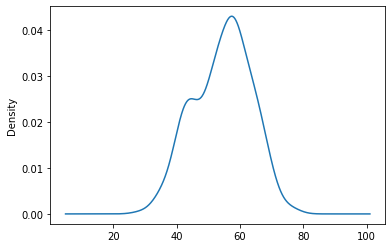

In [7]:
print(X["age"].plot(kind='kde'))

AxesSubplot(0.125,0.125;0.775x0.755)


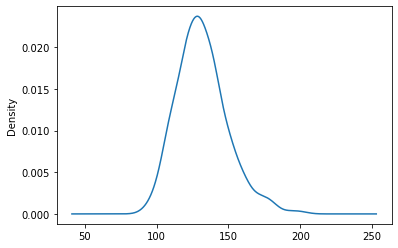

In [8]:
print(X["trestbps"].plot(kind='kde'))

AxesSubplot(0.125,0.125;0.775x0.755)


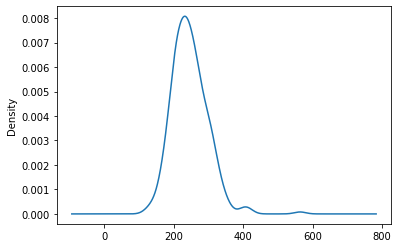

In [9]:
print(X["chol"].plot(kind='kde'))

AxesSubplot(0.125,0.125;0.775x0.755)


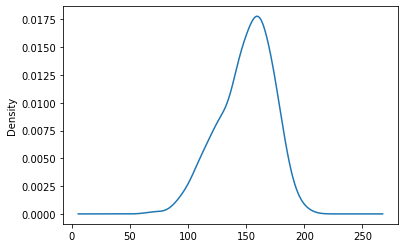

In [10]:
print(X["thalach"].plot(kind='kde'))

AxesSubplot(0.125,0.125;0.775x0.755)


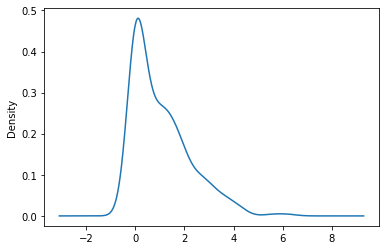

In [11]:
print(X["oldpeak"].plot(kind='kde'))

AxesSubplot(0.125,0.125;0.775x0.755)


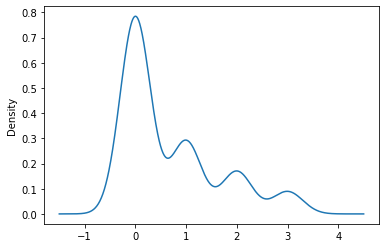

In [12]:
print(X["ca"].plot(kind='kde'))

1    206
0     97
Name: sex, dtype: int64


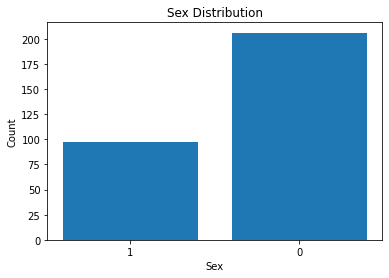

In [13]:
#dla cech kategorycznych

sex_df = pd.DataFrame(X['sex'])

counts = sex_df['sex'].value_counts() #liczę wystapienia 0 i 1
print(counts)
plt.bar(counts.index, counts.values)
plt.xticks(counts.index, ['0', '1'])

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title("Sex Distribution")
plt.show()

4    144
3     86
2     50
1     23
Name: cp, dtype: int64


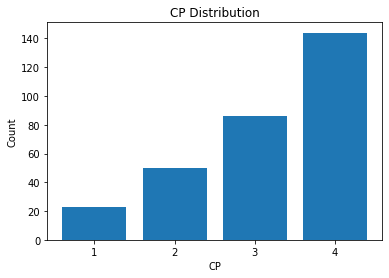

In [14]:
cp_df = pd.DataFrame(X['cp'])

counts = cp_df['cp'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
plt.xticks([1, 2, 3, 4])
plt.xlabel('CP')
plt.ylabel('Count')
plt.title("CP Distribution")
plt.show()

0    258
1     45
Name: fbs, dtype: int64


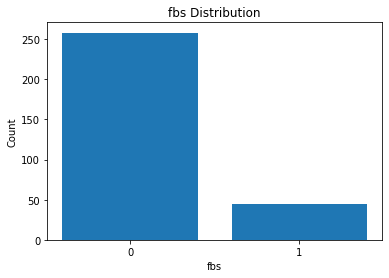

In [15]:
fbs_df = pd.DataFrame(X['fbs'])

counts = fbs_df['fbs'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
plt.xticks([0, 1])
plt.xlabel('fbs')
plt.ylabel('Count')
plt.title("fbs Distribution")
plt.show()

0    151
2    148
1      4
Name: restecg, dtype: int64


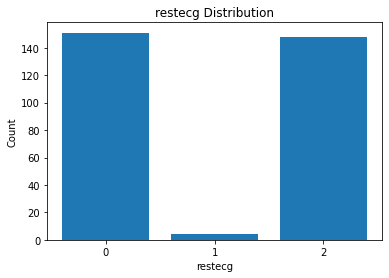

In [16]:
restecg_df = pd.DataFrame(X['restecg'])

counts = restecg_df['restecg'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
plt.xticks([0, 1, 2])
plt.xlabel('restecg')
plt.ylabel('Count')
plt.title("restecg Distribution")
plt.show()

0    204
1     99
Name: exang, dtype: int64


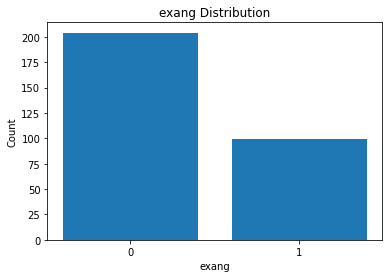

In [17]:
exang_df = pd.DataFrame(X['exang'])

counts = exang_df['exang'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
plt.xticks([0, 1])
plt.xlabel('exang')
plt.ylabel('Count')
plt.title("exang Distribution")
plt.show()

1    142
2    140
3     21
Name: slope, dtype: int64


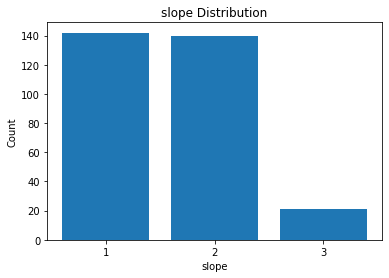

In [18]:
slope_df = pd.DataFrame(X['slope'])

counts = slope_df['slope'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
plt.xticks([1,2,3])
plt.xlabel('slope')
plt.ylabel('Count')
plt.title("slope Distribution")
plt.show()

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64


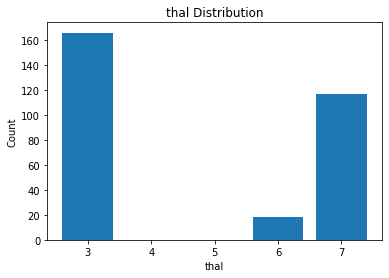

In [19]:
thal_df = pd.DataFrame(X['thal'])

counts = thal_df['thal'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
# plt.xticks([1,2,3])
plt.xlabel('thal')
plt.ylabel('Count')
plt.title("thal Distribution")
plt.show()

In [20]:
print(X['ca'].isnull().sum())

4


In [21]:
print(X['thal'].isnull().sum())

2
